# Spotify recommendation system 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

data = pd.read_csv('./data_folder/data.csv')
genre_data = pd.read_csv('./data_folder/data_w_genres.csv')
year_data = pd.read_csv('./data_folder/data_by_year.csv')
artist_data = pd.read_csv('./data_folder/data_by_artist.csv')

In [2]:
data.head(2),genre_data.head(2),year_data.head(2),artist_data.head(2)

(   valence  year  acousticness  \
 0   0.0594  1921         0.982   
 1   0.9630  1921         0.732   
 
                                              artists  danceability  \
 0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
 1                                     ['Dennis Day']         0.819   
 
    duration_ms  energy  explicit                      id  instrumentalness  \
 0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz             0.878   
 1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8             0.000   
 
    key  liveness  loudness  mode  \
 0   10     0.665   -20.096     1   
 1    7     0.160   -12.441     1   
 
                                                 name  popularity release_date  \
 0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4         1921   
 1                            Clancy Lowered the Boom           5         1921   
 
    speechiness   tempo  
 0       0.0366  80.954  
 1       0.4150  60.936  ,

In [3]:
data.info(),genre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

(None, None)

In [4]:
# create a decade column using apply and lambda
data["decade"]= data["year"].apply(lambda x: str(x)[:3]+'0s')

C:\Users\ISAIAH\AppData\Local\Temp\ipykernel_5056\2293936907.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='decade', data=data, palette='viridis')


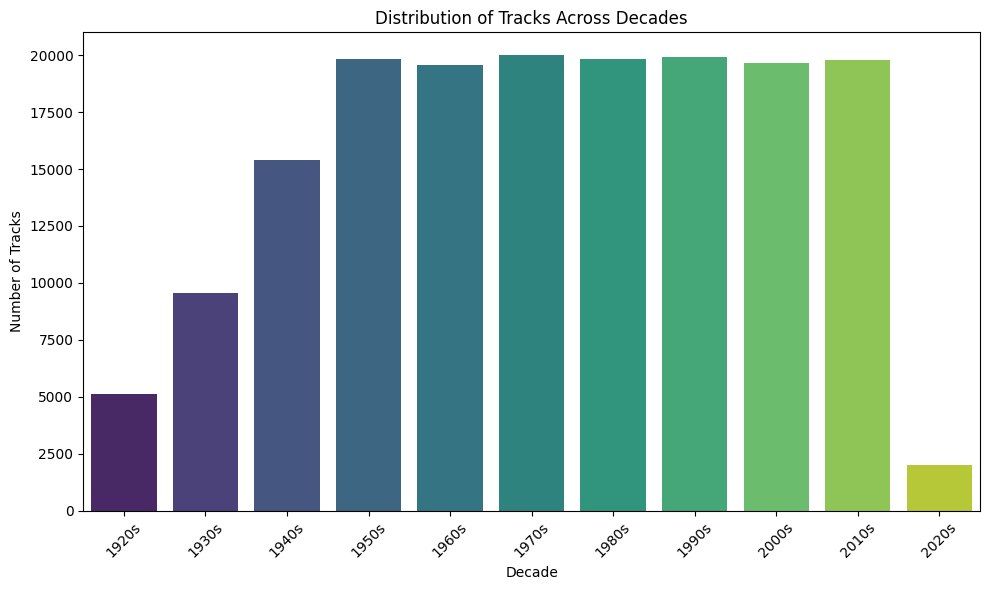

In [5]:
# Plot the distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='decade', data=data, palette='viridis')

# Add labels and title
plt.title('Distribution of Tracks Across Decades')
plt.xlabel('Decade')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
# Define features to plot
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']

# Create line plot
fig = px.line(
    year_data,
    x='year',
    y=sound_features,
    title='Trend of Various Sound Features Over Time',
    labels={'value': 'Feature Value', 'variable': 'Sound Feature'},
)

# Show the plot
fig.show()

In [21]:
# grouping the data into decades
# and calculating the average loudness for each decade
loudness_by_decade = (
    data.groupby((data['year'] // 10) * 10)['loudness']
    .mean()
    .reset_index()
    .rename(columns={'year': 'decade'})
)

# Plot the trend using Plotly Express
fig = px.line(
    loudness_by_decade,
    x='decade',
    y='loudness',
    title='Trend of Loudness Over Decades',
    labels={'decade': 'Decade', 'loudness': 'Average Loudness (dB)'}
)

fig.update_traces(mode='lines+markers')
fig.show()

In [22]:
# Group by genres and compute mean popularity
genre_popularity = genre_data.groupby('genres')['popularity'].mean().reset_index()
#  Get top 10 genres
top_genres = genre_popularity.sort_values(by='popularity', ascending=False).head(10)['genres']

# Filter for top 10 genres and compute feature averages
features = ['valence', 'energy', 'danceability', 'acousticness']
top10_genres = genre_data[genre_data['genres'].isin(top_genres)].groupby('genres')[features].mean().reset_index()

# Convert to long format for grouped bar chart
top10_genres_long = top10_genres.melt(id_vars='genres', value_vars=features,
                                       var_name='feature', value_name='value')

# Plot grouped bar chart
fig = px.bar(
    top10_genres_long,
    x='genres',
    y='value',
    color='feature',
    barmode='group',
    title='Trend of Various Sound Features Over Top 10 Genres',
    labels={'value': 'Average Feature Value', 'genres': 'Genre'}
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()

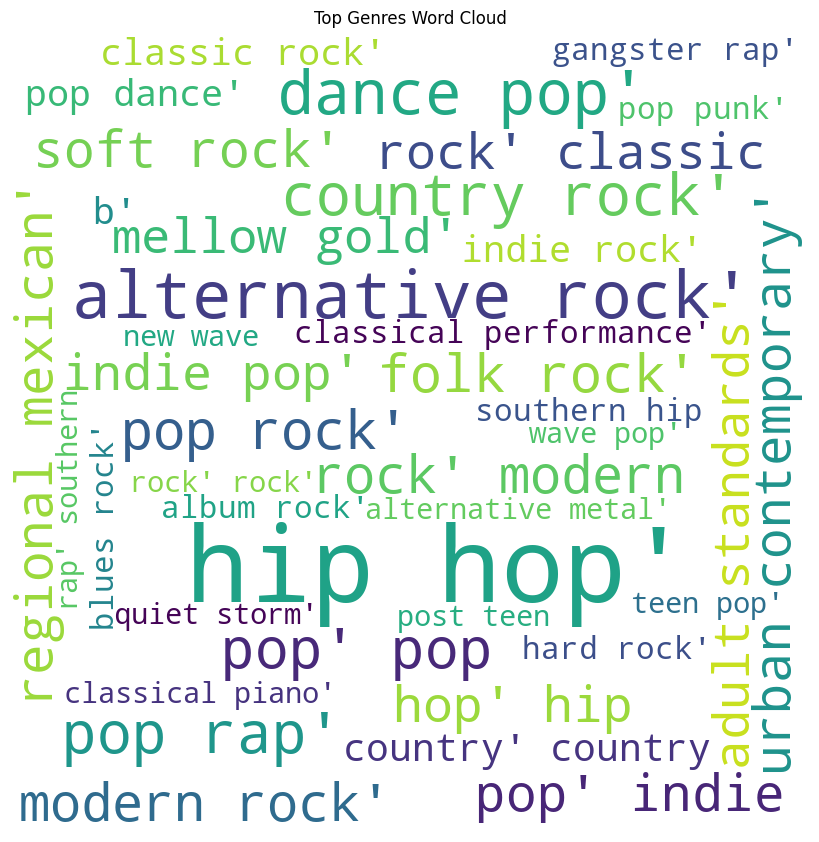

In [ ]:
# Flatten genre list if genres are in list format
if genre_data['genres'].apply(lambda x: isinstance(x, list)).any():
    genre_text = genre_data.explode('genres')['genres'].dropna().astype(str)
else:
    genre_text = genre_data['genres'].dropna().astype(str)

# Combine all genres into one string
comment_words = ' '.join(genre_text)

# Define stopwords
stopwords = set(STOPWORDS)

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=800,
    background_color='white',
    stopwords=stopwords,
    max_words=40,
    min_font_size=10
).generate(comment_words)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Top Genres Word Cloud')
plt.show()

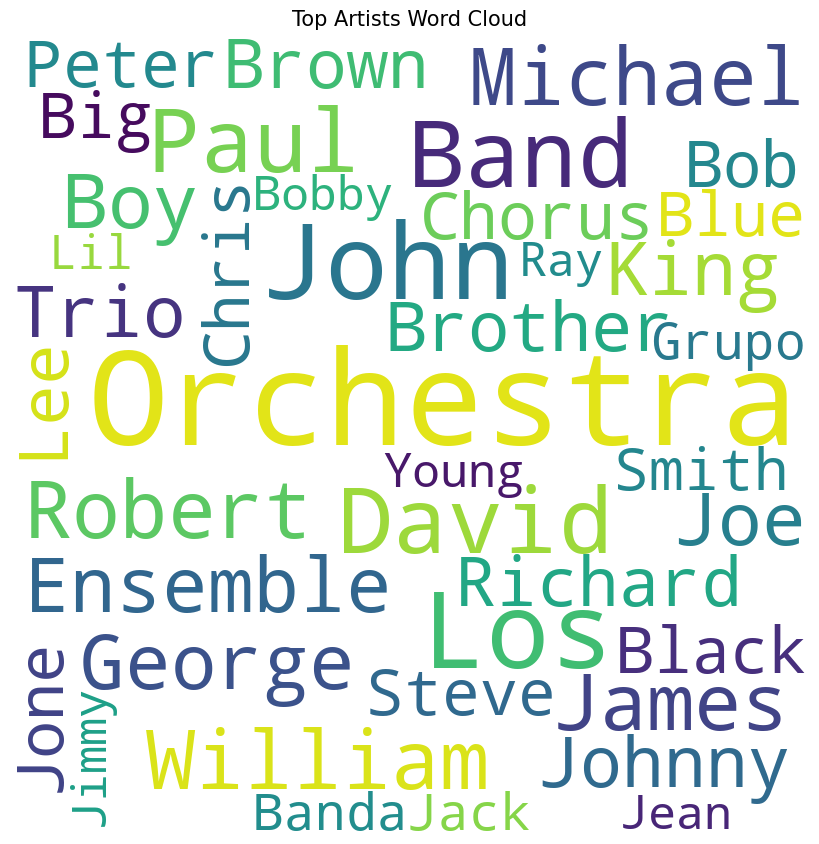

In [12]:
# flatten artist names
if artist_data['artists'].apply(lambda x: isinstance(x, list)).any():
    artist_text = artist_data.explode('artists')['artists'].dropna().astype(str)
else:  
    artist_text = artist_data['artists'].dropna().astype(str)

# Combine all artist names into one string
comment_words = ' '.join(artist_text)

# Define stopwords 
stopwords = set(STOPWORDS)

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=800,
    background_color='white',
    stopwords=stopwords,
    min_word_length=3,
    max_words=40,
    min_font_size=10
).generate(comment_words)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Top Artists Word Cloud',fontsize=15)
plt.show()

In [16]:
# Count the number of songs per artist
artist_song_count = artist_data['artists'].value_counts().reset_index()
artist_song_count.columns = ['artists', 'count']
# Get top 10 artists
top_artists = artist_song_count.sort_values(by='count', ascending=False).head(10)
print(top_artists[['count','artists']])

       count                                            artists
28679      1                                "Weird Al" Yankovic
0          1                                                조정현
1          1                   "Cats" 1981 Original London Cast
2          1                          "Cats" 1983 Broadway Cast
3          1        "Fiddler On The Roof” Motion Picture Chorus
4          1     "Fiddler On The Roof” Motion Picture Orchestra
5          1  "Joseph And The Amazing Technicolor Dreamcoat"...
6          1  "Joseph And The Amazing Technicolor Dreamcoat"...
28663      1                                               鈴木 弘
28662      1                                                陳秀男


In [19]:
# Group by artist and get the mean popularity score for each artist
artist_popularity = artist_data.groupby('artists')['popularity'].mean().reset_index()

# Sort by popularity and get top 10 artists
top10_popular_artists = artist_popularity.sort_values('popularity', ascending=False).head(10)

# Display the result
print(top10_popular_artists[['popularity', 'artists']])

       popularity          artists
20966        93.0      Ritt Momney
14354        92.0        Lele Pons
15070        90.0  Los Legendarios
11764        89.0         Jerry Di
7463         88.0           Emilee
28263        88.0      salem ilese
23687        88.0        Surf Mesa
213          87.0              A7S
14378        86.0     Lenny Santos
16453        86.0        Master KG


# conclusion about the data
**Genre distribution**
* The word cloud for genres reveals the most frequently listened genre of music are:Pop,rock and hiphop,while the others are less frequent but significant.
**Artist Song Count**
* By identifying the top 10 artists with the most songs produced, we can conclude which artists have contributed the largest number of tracks to the dataset.
**Artist Popularity**
* The top 10 artists with the highest popularity scores provide insights of the most influential and recognised artists,Comparing the popularity of these artists with their song counts allows for understanding how prolific artists relate to their popularity.
**sound features**
* The analysis of sound features such as tempo,energy, and danceability reveals the characteristics of the different genres and how they changeover time.
**Data representation**
* The word cloud for genres and the bar chart for artist song count provide a visual representation of the broad range of artists ad genres which suggests it captures the erlative samples of music across different styles and periods.